In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [3]:
wide_ts = pd.read_csv('../dataraw/Housing_data.csv')

In [4]:
ts = pd.melt(wide_ts, id_vars=['RegionID', 'RegionType', 'RegionName', 
                          'SizeRank', 'StateName', 'State', 'Metro', 'CountyName'], var_name='time')
ts.head()

,RegionID,RegionType,RegionName,SizeRank,StateName,State,Metro,CountyName,time,value
0,6181,City,New York,0,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,498033.0
1,12447,City,Los Angeles,1,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,461350.0
2,39051,City,Houston,2,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,221723.0
3,17426,City,Chicago,3,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,312511.0
4,6915,City,San Antonio,4,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,177641.0


In [5]:
ts.describe()

,RegionID,SizeRank,value
count,6.763815e+06,6.763815e+06,5.144513e+06
mean,5.239422e+04,1.480932e+04,3.026857e+05
std,8.158348e+04,8.931044e+03,3.485755e+05
min,3.300000e+03,0.000000e+00,1.068600e+04
25%,1.779000e+04,6.931000e+03,1.534460e+05
50%,3.247600e+04,1.456600e+04,2.187930e+05
75%,4.748000e+04,2.261900e+04,3.343160e+05
max,7.608870e+05,3.096700e+04,1.364134e+07


In [6]:
def get_num_nas(df):
    """Returns a list of Columns and associated NA value count for given DataFrame"""
    results = []
    for column in df.columns.to_list():
        results.append({column : df[column].isna().sum()})
    return results
get_num_nas(ts)

[{'RegionID': 0},
 {'RegionType': 0},
 {'RegionName': 0},
 {'SizeRank': 0},
 {'StateName': 0},
 {'State': 0},
 {'Metro': 1828827},
 {'CountyName': 0},
 {'time': 0},
 {'value': 1619302}]

In [7]:
results = []
for column in ts.columns.to_list():
    results.append({column : ts[column].value_counts()})
results

[{'RegionID': 8196      261
  19136     261
  31428     261
  19138     261
  47837     261
           ... 
  21830     261
  238904    261
  398729    261
  42335     261
  16376     261
  Name: RegionID, Length: 25915, dtype: int64},
 {'RegionType': City    6763815
  Name: RegionType, dtype: int64},
 {'RegionName': Franklin       7308
  Madison        6525
  Clinton        6264
  Washington     6264
  Springfield    6264
                 ... 
  Grand Cane      261
  Temperance      261
  Wedowee         261
  Paullina        261
  Readstown       261
  Name: RegionName, Length: 16563, dtype: int64},
 {'SizeRank': 29449    297018
  28769      3915
  25996      3915
  29144      3915
  23231      3654
            ...  
  1446        261
  5540        261
  9634        261
  1445        261
  4094        261
  Name: SizeRank, Length: 11236, dtype: int64},
 {'StateName': TX    402201
  IL    335646
  OH    302499
  CA    291276
  MO    267786
  IA    251865
  PA    250299
  MN    234117


In [8]:

ts.dropna(inplace=True)
get_num_nas(ts)

[{'RegionID': 0},
 {'RegionType': 0},
 {'RegionName': 0},
 {'SizeRank': 0},
 {'StateName': 0},
 {'State': 0},
 {'Metro': 0},
 {'CountyName': 0},
 {'time': 0},
 {'value': 0}]

In [9]:
ts['time'] = pd.to_datetime(ts['time'])
ts = ts.groupby('time').aggregate({'value':'mean'})
# ts.set_index('time', inplace=True)
ts

,value
time,
2000-01-31,252419.232516
2000-02-29,253214.693889
2000-03-31,253865.413105
2000-04-30,255545.174696
2000-05-31,257108.206984
...,...
2021-05-31,410343.288321
2021-06-30,417335.903581
2021-07-31,424944.012958


In [12]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'RegionType', 'RegionName', 
                          'SizeRank', 'StateName', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

<AxesSubplot:xlabel='time'>

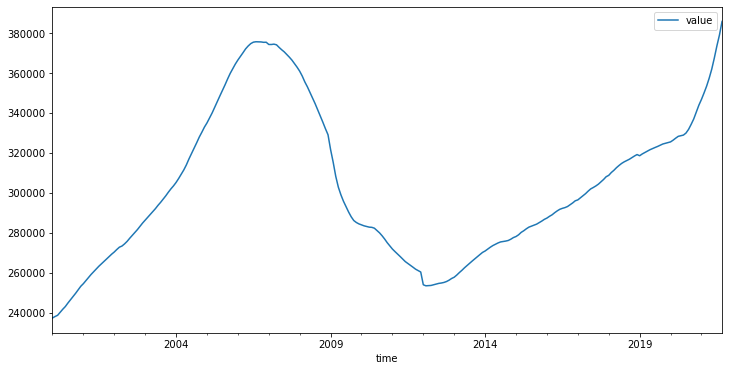

In [14]:
melt_data(wide_ts).plot(figsize=(12,6))